<a href="https://colab.research.google.com/github/lilian662/EDO/blob/main/edpI04_06_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


ACTIVIDAD 04-JUNIO-25
```

```



In [ ]:
import sympy as sp

# definir variables simbolicas
x, y, t= sp.symbols('x y t', real=True)
m, n =sp.symbols('m n', integer=True, positive= True) #
pi=sp.pi #

# parametros de la membrana
a=4 # longitud de x
b=2 #l ongitud de m
c= sp.Symbol('c', real=True, positive=True) # velocidad inical

# funcion inicial f(x, y)
f_xy= 0.1*(4*x*x**2)*(2*y-y**2)

# base escrita en senos
Xn= sp.sin(n*pi*x/a)
Ym= sp.sin(m*pi*y/b)

# Calculo de coeficientes Amn
A_mn= (4/(a*b))*sp.integrate(sp.integrate(f_xy*Xn*Ym,(x,0,a)),
(y, 0, b))

A_mn_simplified = sp.simplify(A_mn)
print("coeficientes A_mn simplificado:")
display(A_mn_simplified)

#frecuencia angular para el modo (m,n)
omega_mn = pi*c*sp.sqrt((n/a)**2+(m/b)**2)

#solucion general de la membrana
U_mn = A_mn_simplified* sp.sin(n * pi *x /a)* sp.sin(m*pi*y/b)* sp.cos(omega_mn*t)
print("\n Solucion general u(x, y, t)para el modo (m,n):")
display(U_mn)

coeficientes A_mn simplificado:


(-1)**n*((-1)**m*(819.2*pi**2*n**2 - 4915.2) - 819.2*pi**2*n**2 + 4915.2)/(pi**6*m**3*n**3)


 Solucion general u(x, y, t)para el modo (m,n):


(-1)**n*((-1)**m*(819.2*pi**2*n**2 - 4915.2) - 819.2*pi**2*n**2 + 4915.2)*sin(pi*m*y/2)*sin(pi*n*x/4)*cos(pi*c*t*sqrt(m**2/4 + n**2/16))/(pi**6*m**3*n**3)

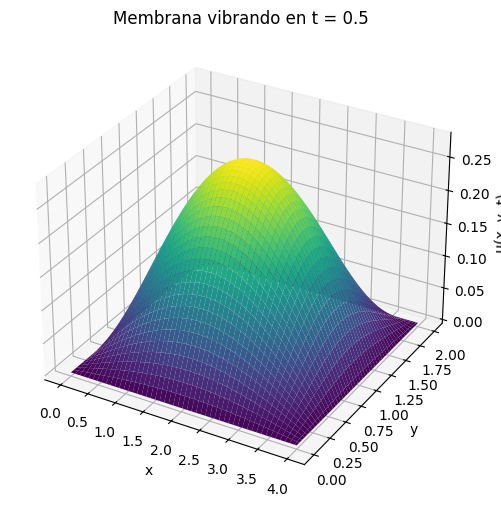

In [8]:
#GRAFICA DE LA SOLUCION
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la membrana
a = 4
b = 2
c = 1

# Tiempo fijo para observar la vibración
t = 0.5

# Número de términos a sumar (precisión)
N_max = 3  # hasta m, n = 3

# Espacio (rejilla)
x_vals = np.linspace(0, a, 100)
y_vals = np.linspace(0, b, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Función A_mn
def A_mn(m, n):
    num = 102.4
    denom = (np.pi**6) * (m**3) * (n**3)
    factor = -(-1)**m - (-1)**n + (-1)**(m + n) + 1
    return (num / denom) * factor

# Solución aproximada
def u_aprox(x, y, t):
    suma = 0
    for m in range(1, N_max + 1):
        for n in range(1, N_max + 1):
            Amn = A_mn(m, n)
            sinx = np.sin(n * np.pi * x / a)
            siny = np.sin(m * np.pi * y / b)
            omega_mn = np.pi * c * np.sqrt((n / a)**2 + (m / b)**2)
            suma += Amn * sinx * siny * np.cos(omega_mn * t)
    return suma

# Evaluar u sobre la rejilla
U = u_aprox(X, Y, t)

# Graficar
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, U, cmap='viridis')
ax.set_title(f'Membrana vibrando en t = {t}')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y, t)')
plt.show()